# Linear Regression with Regularization

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Linear Regression model (without Regularization)

* n_features - number of features to be considered
* noise - deviation from straight line
* n_samples - number of samples

### Make dataset

In [2]:
from sklearn.datasets import make_regression
X,y = make_regression(n_features=1, noise=10, n_samples=1000, random_state=42)   

In [3]:
X[:5], y[:5]

(array([[-1.75873949],
        [ 1.03184454],
        [-0.48760622],
        [ 0.18645431],
        [ 0.72576662]]),
 array([-32.77038605,   3.50459106, -17.93030767,  -3.99020124,
         13.10526434]))

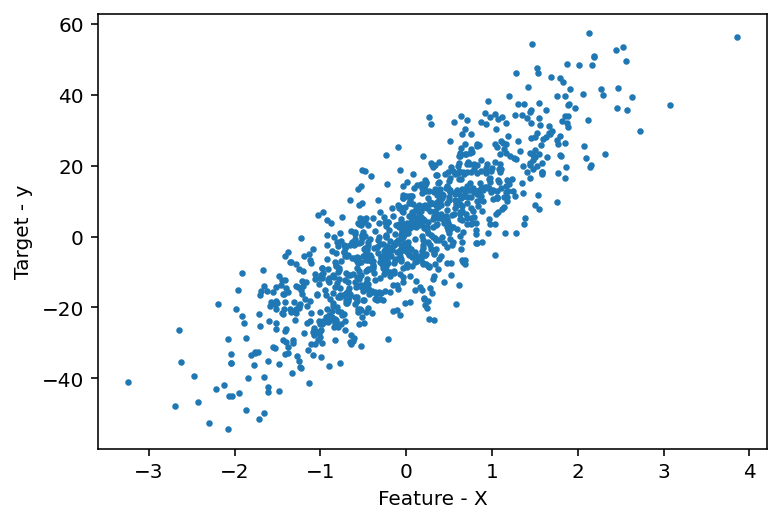

In [4]:
plt.xlabel('Feature - X')
plt.ylabel('Target - y')
plt.scatter(X, y, s=5)

### Regression

In [5]:
lr = LinearRegression()
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([16.63354605]), 0.04526205905820929)

In [6]:
# Predicting using trained model
y_pred = lr.predict(X)

### Plotting

* Blue dots represent maps to actual target data
* Orange dots represent predicted data 

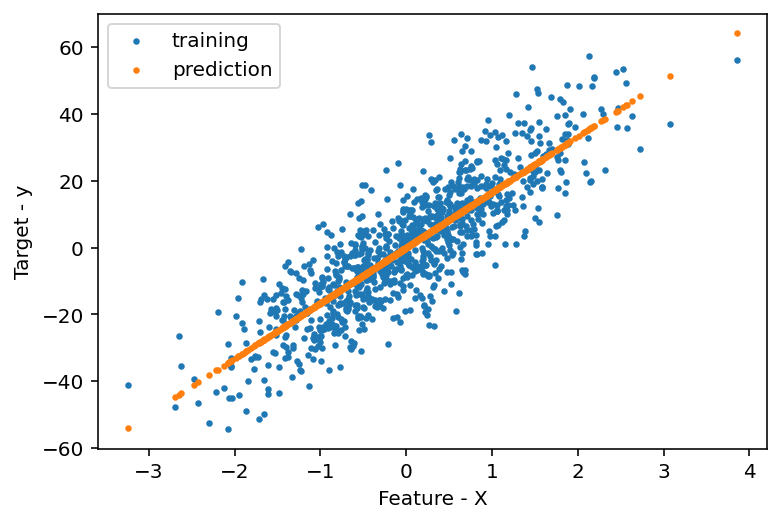

In [7]:
plt.scatter(X, y, s=5, label='training')
plt.scatter(X, y_pred, s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - y')
plt.legend()
plt.show()

## Regularized Regression Methods 
- Ridge Regression
  * Ridge Regression imposes penalty on size of coef.
  * Less impacted by outliers.

### Make outliers

In [8]:
outliers = y[950:] - 600; outliers

array([-620.72518918, -607.24456936, -602.35967987, -589.77927836,
       -606.97474711, -602.5249083 , -617.53354476, -581.41160958,
       -568.58829982, -588.48103465, -576.37267804, -608.20115427,
       -627.62758019, -629.16862648, -600.74874687, -603.71586107,
       -597.22691815, -589.89284288, -587.08855694, -612.90456844,
       -607.72930237, -606.38449017, -592.78147515, -564.34789926,
       -579.47960861, -596.20989757, -608.437806  , -595.54249235,
       -605.14184967, -585.14253937, -602.46852941, -591.20272709,
       -576.61995697, -624.29969481, -633.11859313, -584.0344489 ,
       -580.06411958, -602.36414388, -600.03658325, -598.97777085,
       -600.7449772 , -588.33620239, -610.44463741, -620.9629963 ,
       -613.84011222, -622.5064205 , -586.40905438, -591.93411712,
       -562.64219745, -611.96087644])

In [9]:
import numpy as np
y_out = np.append(y[:950], outliers)

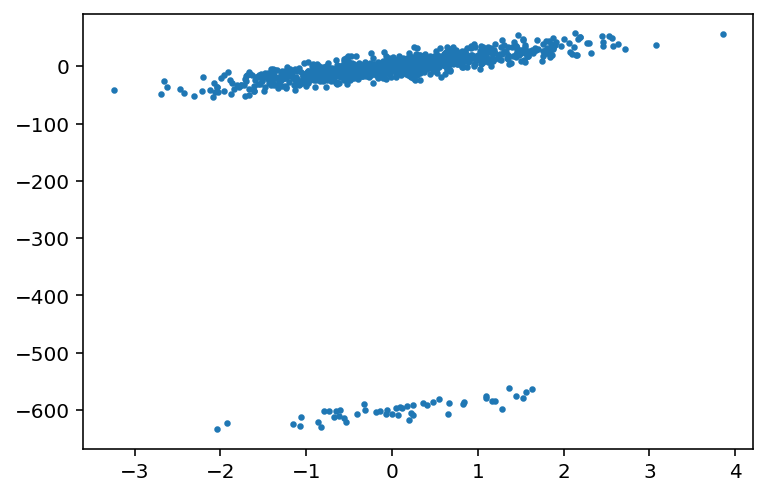

In [10]:
plt.scatter(X, y_out, s=5)

### Regression without Regularization

In [11]:
lr = LinearRegression()
lr.fit(X, y_out)
y_out_pred = lr.predict(X)

Text(0.5, 1.0, 'Linear Regression')

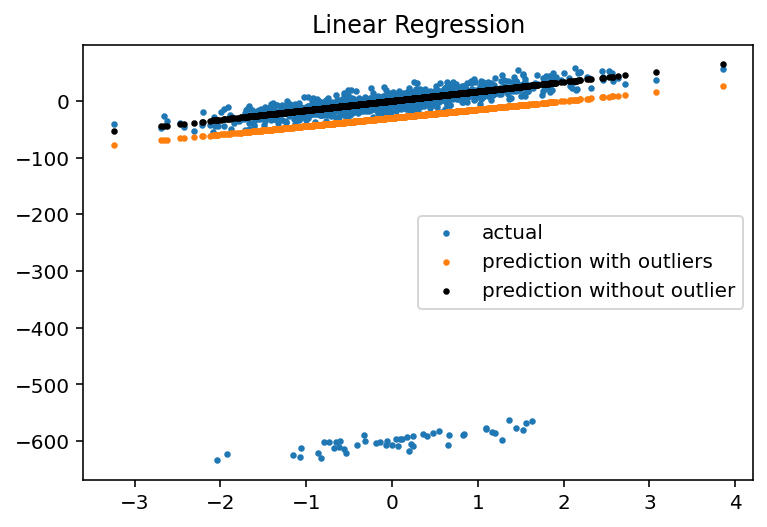

In [12]:
plt.scatter(X, y_out, s=5, label='actual')
plt.scatter(X, y_out_pred, s=5, label='prediction with outliers')
plt.scatter(X, y_pred,s=5, c='k', label='prediction without outlier')
plt.legend() 
plt.title('Linear Regression')

In [13]:
lr.coef_, lr.intercept_

(array([14.75586098]), -29.918438428236247)

### With Ridge(L2) Regularization

* 영향이 너무 큰 가중치들을 줄인다. 

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1000)
ridge.fit(X, y_out)
y_ridge_pred = ridge.predict(X)

Text(0.5, 1.0, 'Linear Regression')

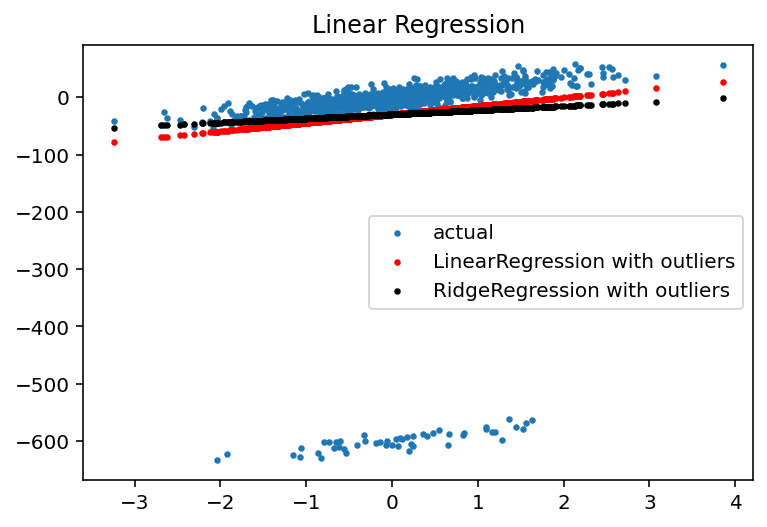

In [34]:
plt.scatter(X, y_out,s=5,label='actual')
plt.scatter(X, y_out_pred,s=5, c='r' , label='LinearRegression with outliers')
plt.scatter(X, y_ridge_pred,s=5,c='k', label='RidgeRegression with outliers')
plt.legend()
plt.title('Linear Regression')

In [35]:
ridge.coef_, ridge.intercept_    # 기울기 coefficient(w) 가 값이 훨씬 작아짐.

(array([7.21930478]), -29.77274130320161)

### With Lasso(L1) Regularization

* 영향이 적은 가중치들을 무시한다. 

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1000)
lasso.fit(X, y_out)
y_lasso_pred = lasso.predict(X)

Text(0.5, 1.0, 'Linear Regression')

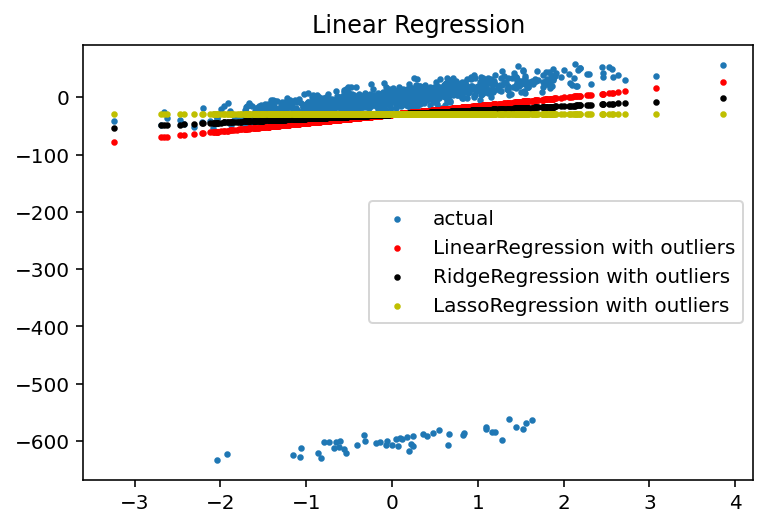

In [22]:
plt.scatter(X, y_out,s=5,label='actual')
plt.scatter(X, y_out_pred,s=5, c='r' , label='LinearRegression with outliers')
plt.scatter(X, y_ridge_pred,s=5,c='k', label='RidgeRegression with outliers')
plt.scatter(X, y_lasso_pred,s=5,c='y', label='LassoRegression with outliers')
plt.legend()
plt.title('Linear Regression')

In [23]:
lasso.coef_, lasso.intercept_

(array([0.]), -29.63317730014139)

## Effects of alpha using Ridge on Coefficients 

### Make dataset

In [36]:
X, y, w = make_regression(n_samples=1000, n_features=10, coef=True,
                          random_state=42, bias=3.5)
# w: The coefficient of the underlying linear model. It is returned only if coef is True.

In [37]:
w

array([32.12551734, 76.33080772, 33.6926875 ,  9.42759779,  5.16621758,
       58.28693612, 29.43481665,  7.18075454, 10.30191944, 75.31997019])

- Training Ridge for different values of alpha
  * Coefs calculated are appended to a list
  * Generate 20 alphas from 10^-6 to 10^6

In [38]:
alphas = np.logspace(-3, 5, 200) # 0.001 ~ 10^5 사이의 200개 표본
alphas[:20], alphas[-20:]

(array([0.001     , 0.00109699, 0.00120338, 0.00132009, 0.00144812,
        0.00158857, 0.00174263, 0.00191164, 0.00209705, 0.00230043,
        0.00252354, 0.00276829, 0.00303677, 0.00333129, 0.00365438,
        0.00400881, 0.0043976 , 0.00482411, 0.00529198, 0.00580523]),
 array([ 17225.85965399,  18896.52339691,  20729.21779595,  22739.65752358,
         24945.0813523 ,  27364.39997075,  30018.35813576,  32929.71255097,
         36123.42699709,  39626.88638701,  43470.13158125,  47686.11697714,
         52310.99308056,  57384.41648302,  62949.88990222,  69055.13520162,
         75752.50258772,  83099.41949353,  91158.88299751, 100000.        ]))

In [39]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a) # 값이 큰 w 값을 작게!
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

In [40]:
w

array([32.12551734, 76.33080772, 33.6926875 ,  9.42759779,  5.16621758,
       58.28693612, 29.43481665,  7.18075454, 10.30191944, 75.31997019])

In [41]:
coefs[:5]

[array([32.12547819, 76.33071941, 33.69264671,  9.42759217,  5.16620902,
        58.28688033, 29.43478769,  7.18074889, 10.30191419, 75.31989693]),
 array([32.12547439, 76.33071085, 33.69264275,  9.42759163,  5.16620819,
        58.28687492, 29.43478488,  7.18074834, 10.30191368, 75.31988982]),
 array([32.12547022, 76.33070145, 33.69263841,  9.42759103,  5.16620728,
        58.28686898, 29.4347818 ,  7.18074774, 10.30191312, 75.31988203]),
 array([32.12546566, 76.33069115, 33.69263365,  9.42759038,  5.16620628,
        58.28686247, 29.43477841,  7.18074708, 10.30191251, 75.31987348]),
 array([32.12546064, 76.33067984, 33.69262843,  9.42758966,  5.16620518,
        58.28685533, 29.43477471,  7.18074636, 10.30191184, 75.3198641 ])]

`alpha` 값이 커지면 w 값이 굉장히 작아지는 것을 볼 수 있다. 

In [42]:
coefs[-5:]

[array([0.36905501, 0.94856311, 0.38307061, 0.18174143, 0.03080575,
        0.87029109, 0.43753906, 0.11359349, 0.22092661, 1.11708021]),
 array([0.3367566 , 0.86565699, 0.34953102, 0.1659322 , 0.02807343,
        0.79439856, 0.3993917 , 0.10368337, 0.2017385 , 1.01966879]),
 array([0.30725841, 0.78992058, 0.31890168, 0.15147756, 0.02558406,
        0.72504039, 0.36452758, 0.09462722, 0.18418953, 0.93064419]),
 array([0.28032211, 0.72074665, 0.29093448, 0.1382649 , 0.02331595,
        0.66166797, 0.33267124, 0.08635322, 0.16814427, 0.84930233]),
 array([0.2557289 , 0.65757725, 0.26540173, 0.12619038, 0.02124935,
        0.60377642, 0.30356917, 0.07879532, 0.15347768, 0.77499522])]

- Plotting alphas & coefs: different colors represents different coefs

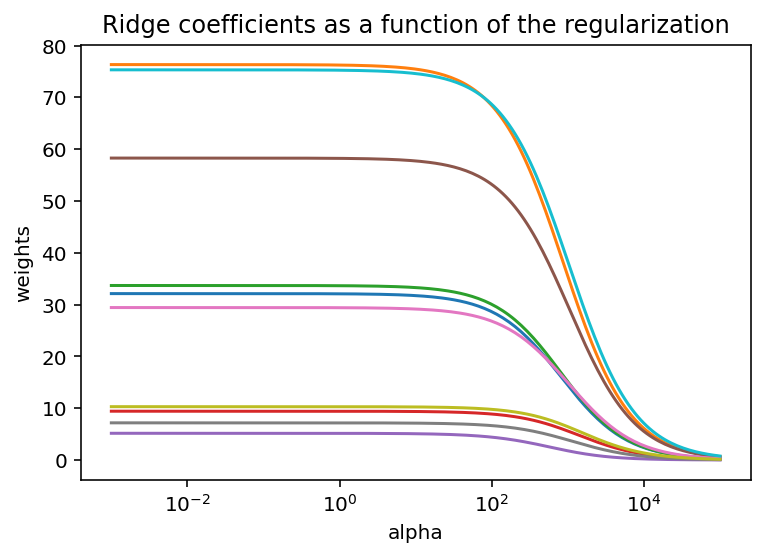

In [43]:
ax = plt.gca()
# Get the current Axes instance on the current figure matching the given keyword 
# args, or create one.

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

- Conclusion
    * 큰 가중치들을 작게 만드는 것을 볼 수 있다. 
    * As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the randomly sampled vector w (similar to LinearRegression).
    * For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) leading to a simpler and biased solution.

## Effects of alpha using Lasso on Coefficients 

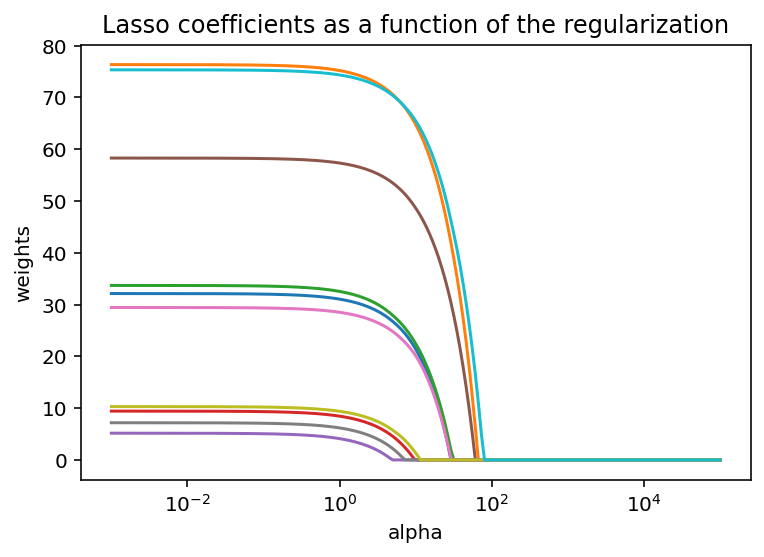

In [44]:
# lasso 
X, y, w = make_regression(n_samples=1000, n_features=10, coef=True,
                          random_state=42, bias=3.5)

alphas = np.logspace(-3, 5, 200)
coefs = []
for a in alphas:
    lasso = Lasso(max_iter=10000, alpha=a) # 작은 값을 무시!
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

ax = plt.gca()
# Get the current Axes instance on the current figure matching the given keyword 
# args, or create one.

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()


* Conclusion
    * 작은 가중치들을 무시하는 것을 볼 수 있다. 

## Example

- https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

- RSS (residual sum of square): sum of square of error

### Setup

In [45]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

### Make dataset

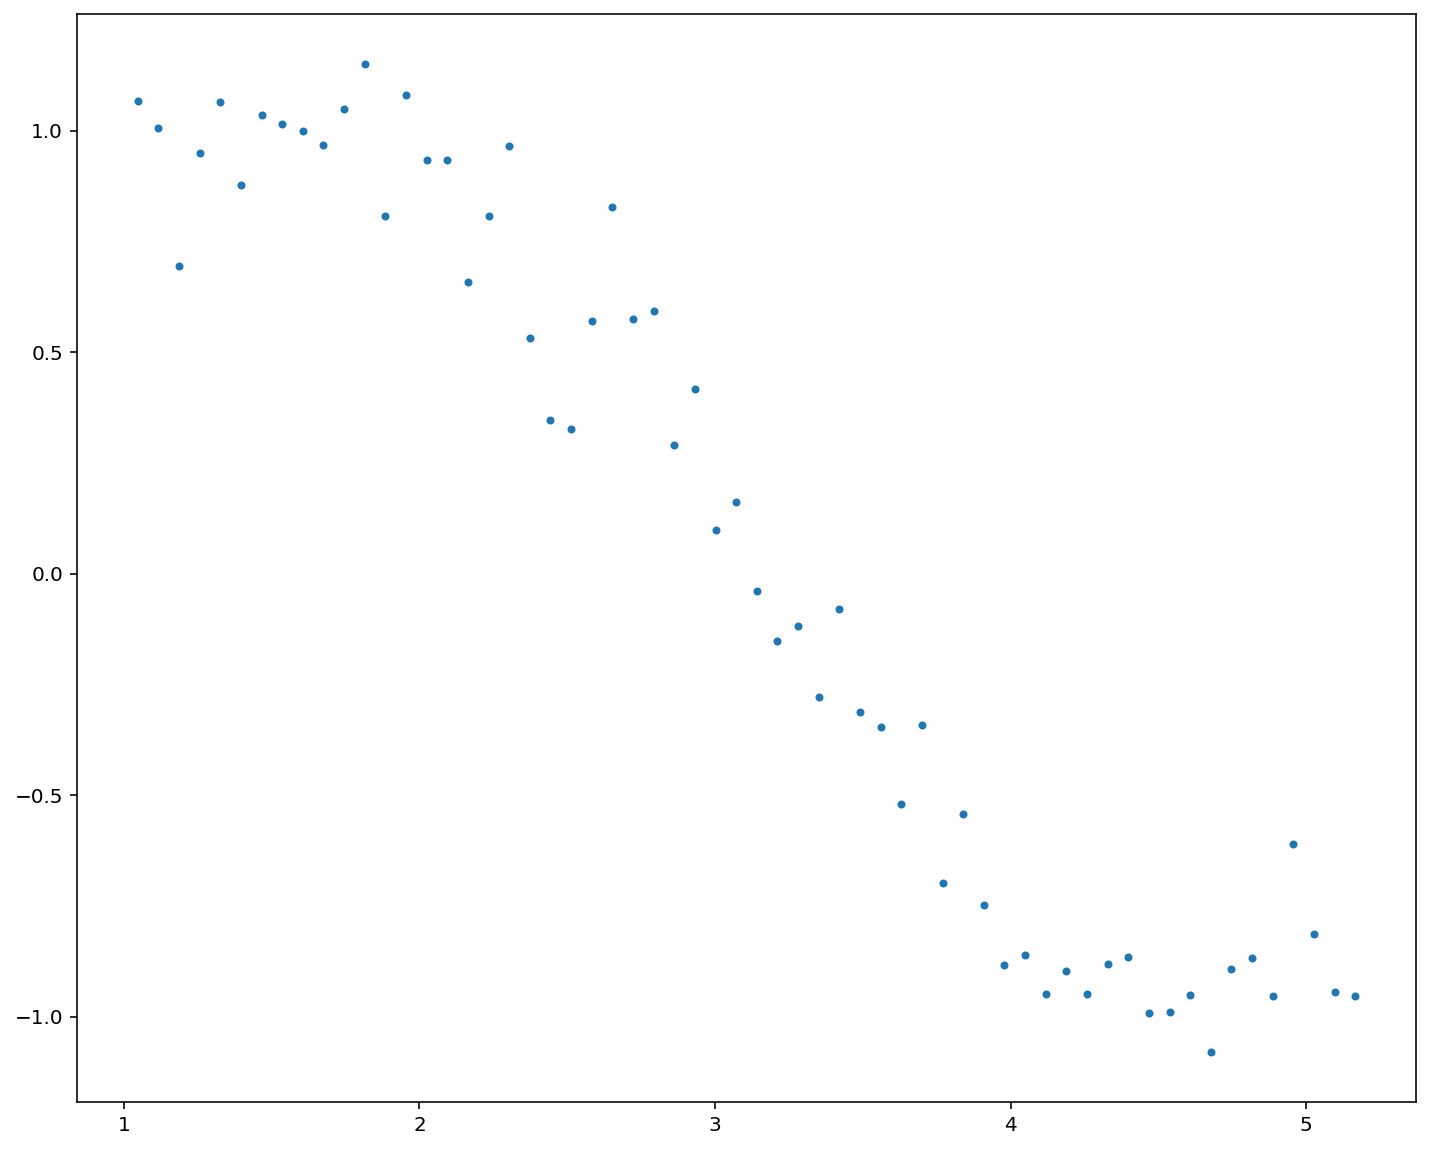

In [46]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

### Polynomial(Non-Linear) regression 

with powers of x from 1 to 15

In [47]:
for i in range(2,16):  # power of 1 is already there
    colname = 'x_%d'%i      # new var will be x_power
    data[colname] = data['x'] ** i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [48]:
from sklearn.linear_model import LinearRegression

def linear_regression(data, power, models_to_plot):
    # initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    # Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    # Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    # Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [49]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)


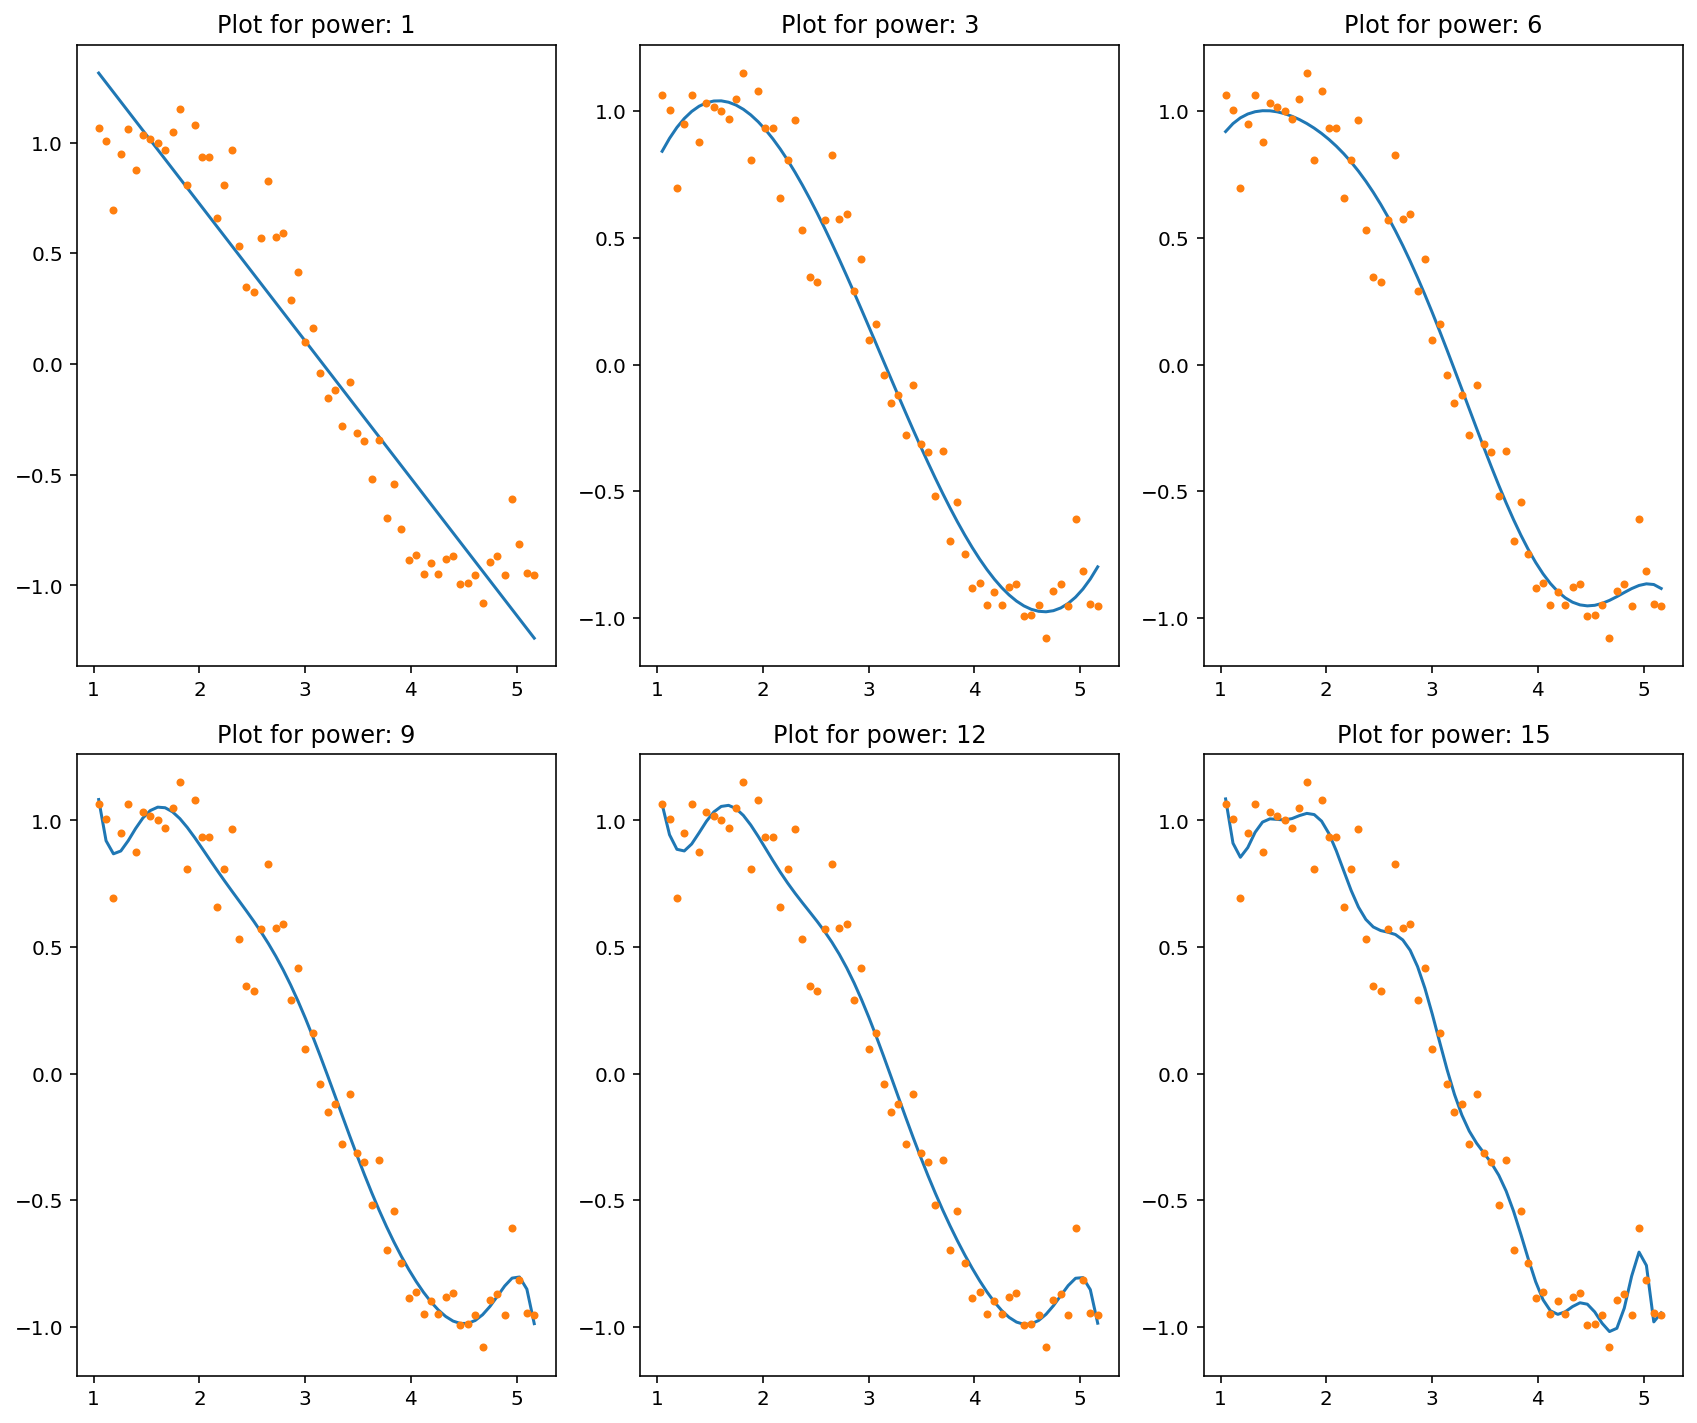

In [50]:
# Define the powers to plot
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

- As the model complexity increases, the models tends to fit even smaller deviations in the training data set, possibly leading to overfitting.
- the size of coefficients increase exponentially with increase in model complexity.
- What does a large coefficient signify? It means that we’re putting a lot of emphasis on that feature, i.e. the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts modelling intricate relations to estimate the output and ends up overfitting to the particular training data.

### Ridge

In [51]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha

    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

C:\Users\wjsdu\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.49384e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


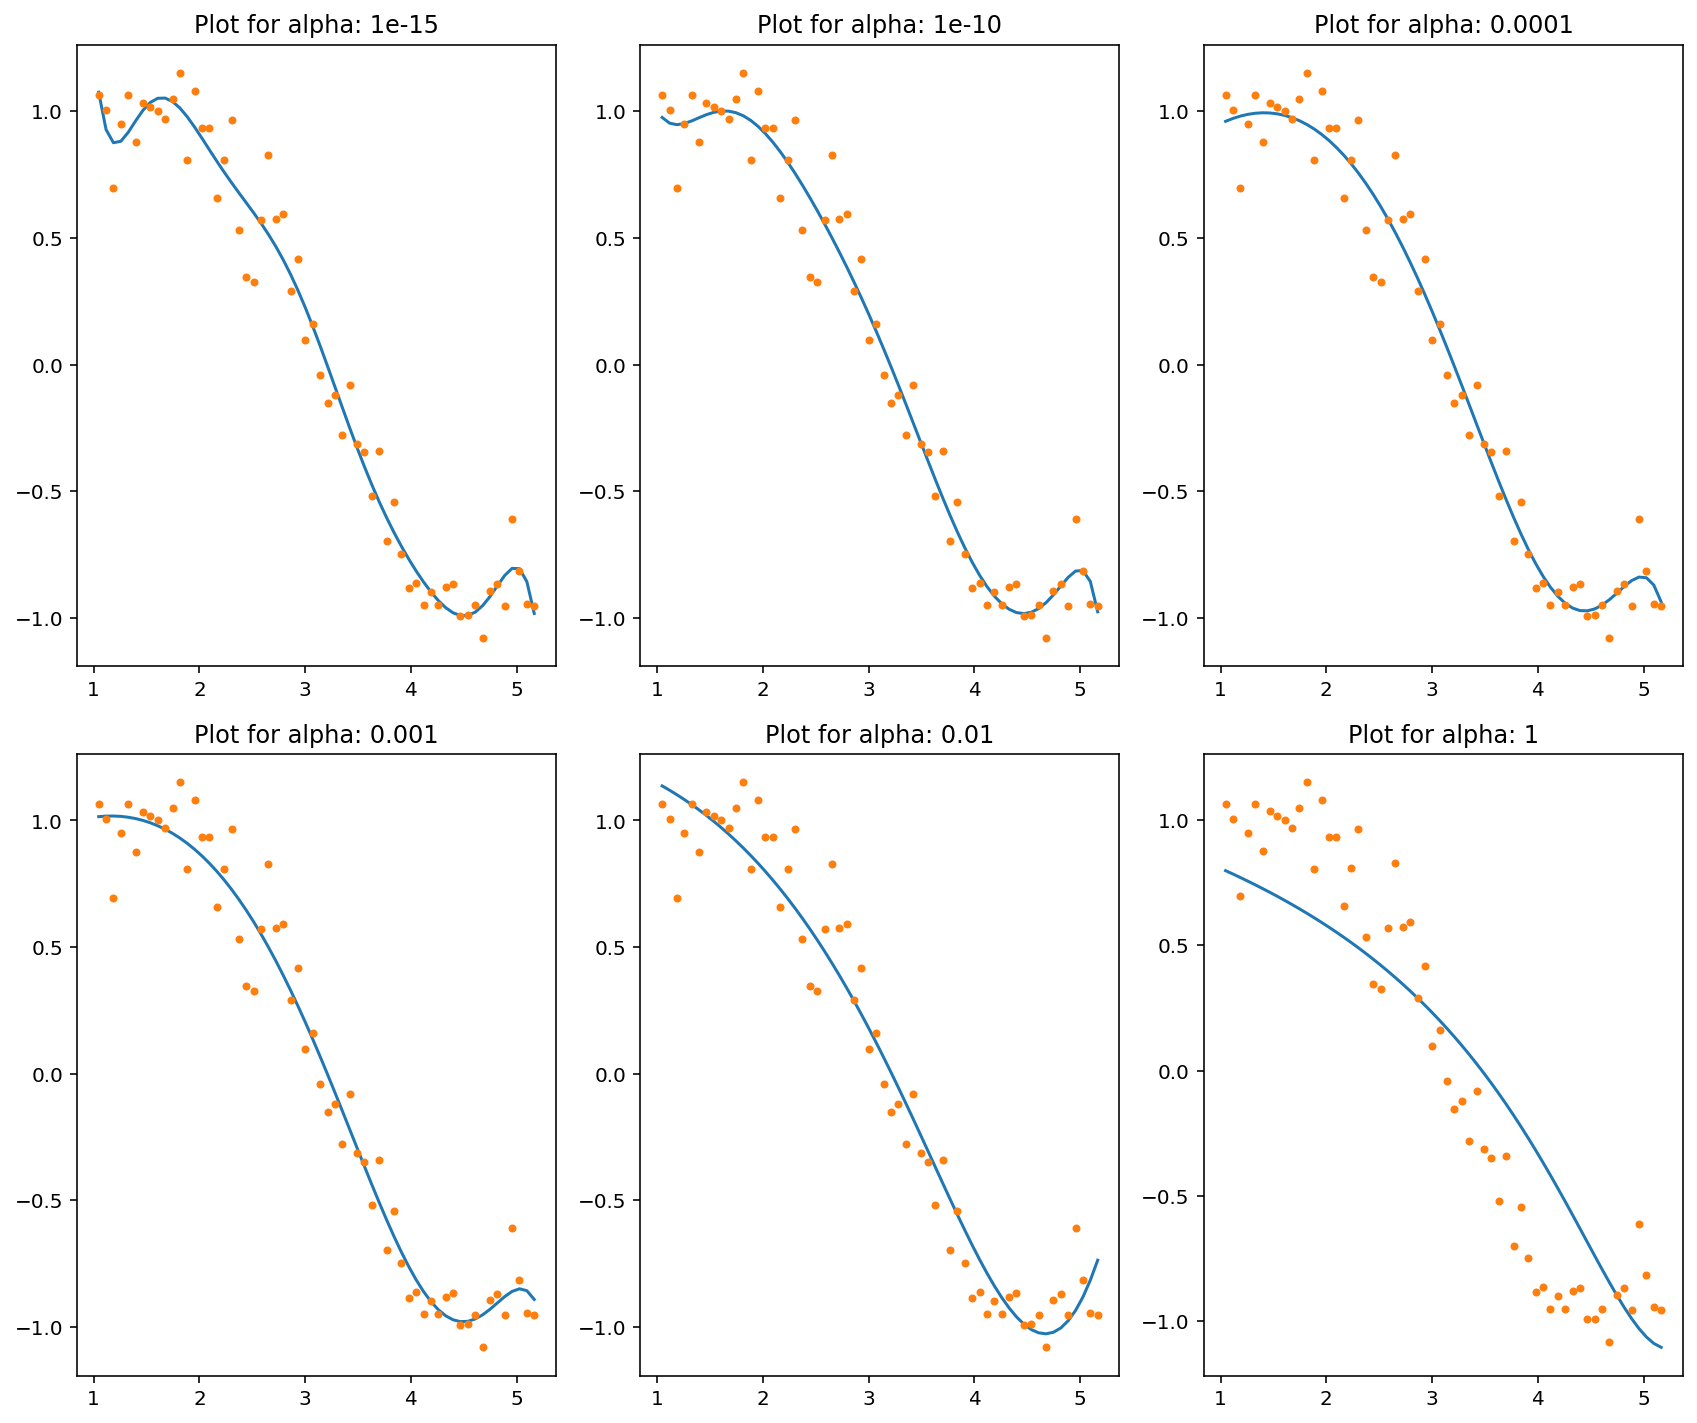

In [62]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 1:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [53]:
# Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,94,-3e+02,3.8e+02,-2.3e+02,65,0.56,-4.3,0.39,0.2,-0.028,-0.0069,0.0012,0.00019,-5.6e-05,4.1e-06,-7.8e-08
alpha_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
alpha_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
alpha_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
alpha_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
alpha_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
alpha_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
alpha_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
alpha_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


### Lasso

In [54]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\Users\wjsdu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47835738259043836, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(
C:\Users\wjsdu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47828183990577433, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(
C:\Users\wjsdu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.470793301904076, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(


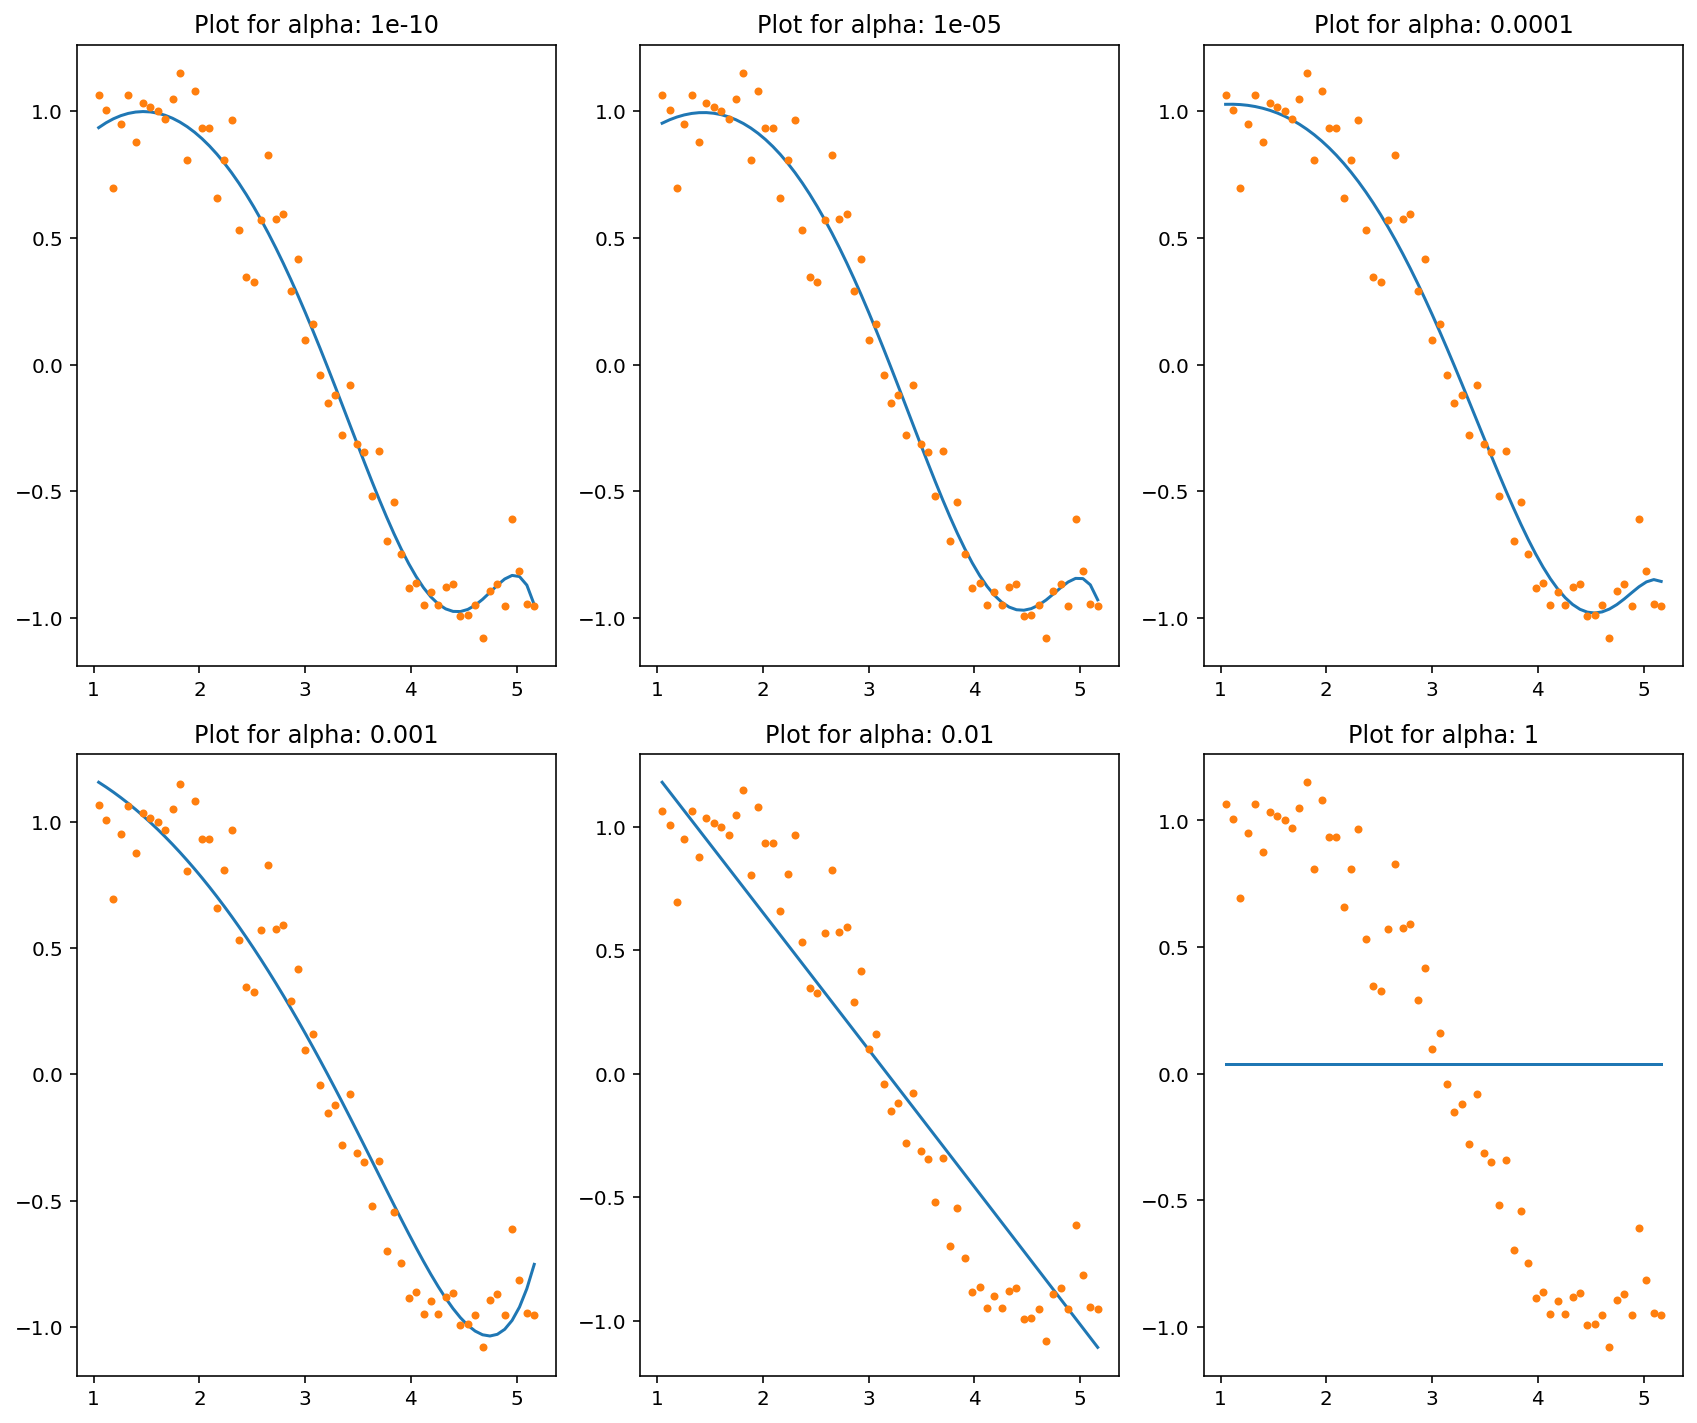

In [55]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [56]:
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1,1.1,1.1,1.1,1.2,1.3,1.3,1.4,1.4,1.5,1.6,1.7,1.7,1.8,1.9,2
1,1.1,1,1.2,1.4,1.6,1.7,1.9,2.2,2.4,2.7,3,3.4,3.8,4.2,4.7,5.3
2,1.2,0.7,1.4,1.7,2,2.4,2.8,3.3,3.9,4.7,5.5,6.6,7.8,9.3,11,13
3,1.3,0.95,1.6,2,2.5,3.1,3.9,4.9,6.2,7.8,9.8,12,16,19,24,31
4,1.3,1.1,1.8,2.3,3.1,4.1,5.4,7.2,9.6,13,17,22,30,39,52,69


In [57]:
data.shape

(60, 16)

In [58]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-10,0.96,0.22,1.1,-0.37,0.00088,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-08,0.96,0.22,1.1,-0.37,0.00077,0.0016,-0.00011,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.3e-09,2e-10,-1.9e-10,-9.3e-11
alpha_1e-05,0.96,0.5,0.6,-0.13,-0.038,-0,0,0,0,7.7e-06,1e-06,7.7e-08,0,0,0,-0,-7e-11
alpha_0.0001,1,0.9,0.17,-0,-0.048,-0,-0,0,0,9.5e-06,5.1e-07,0,0,0,-0,-0,-4.4e-11
alpha_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.5e-08,7.5e-10,0,0,0
alpha_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [59]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

- Conclusion
  - Ridge: It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is **coefficient shrinkage** and **reducing model complexity**.
  - Lasso: Along with **shrinking coefficients**, lasso performs **feature selection** as well. (Remember the ‘selection‘ in the lasso full-form) As we observed, some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.
  - 계수 `alpha` 는 Ridge보다 Lasso에서 더 큰 영향을 보인다. Ridge에서는 10e-2 ~ 10e-4 값을 일반적으로 사용하는 데 반해, Lasso에서는 10e-2 이상의 값에서는 표현력을 잃는다. 

- Typical use cases:

  - Ridge: It is majorly used to **prevent overfitting**. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.
  - Lasso: Since it provides sparse solutions, it is generally **the model of choice** (or some variant of this concept) for modelling cases where the **# of features are in millions or more**. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.